In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings


warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/Healthcare-Diabetes.csv")


In [4]:
df.head()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [6]:
df.shape


(2768, 10)

In [7]:
df.columns.to_list()


['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
df.describe()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Create an imputer object with a strategy (mean, median, mode)
imputer = SimpleImputer(strategy='mean')  # Use 'median' for skewed data if preferred

# Apply the imputer to the appropriate columns (numerical)
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age']] = imputer.fit_transform(df[['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'DiabetesPedigreeFunction',
                                                                    'Age']])

empty_series = pd.Series(dtype='int64')



Series([], dtype: int64)


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Option 1: MinMax Scaling
scaler = MinMaxScaler()

# Scale the features (excluding the target variable 'Outcome')
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Exclude the target variable
df_scaled['Outcome'] = df['Outcome'].values  # Add the target variable back

# Option 2: Standard Scaling (uncomment if you want to use StandardScaler instead)
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
# df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
# df_scaled['Outcome'] = df['Outcome'].values

# Define features and target
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


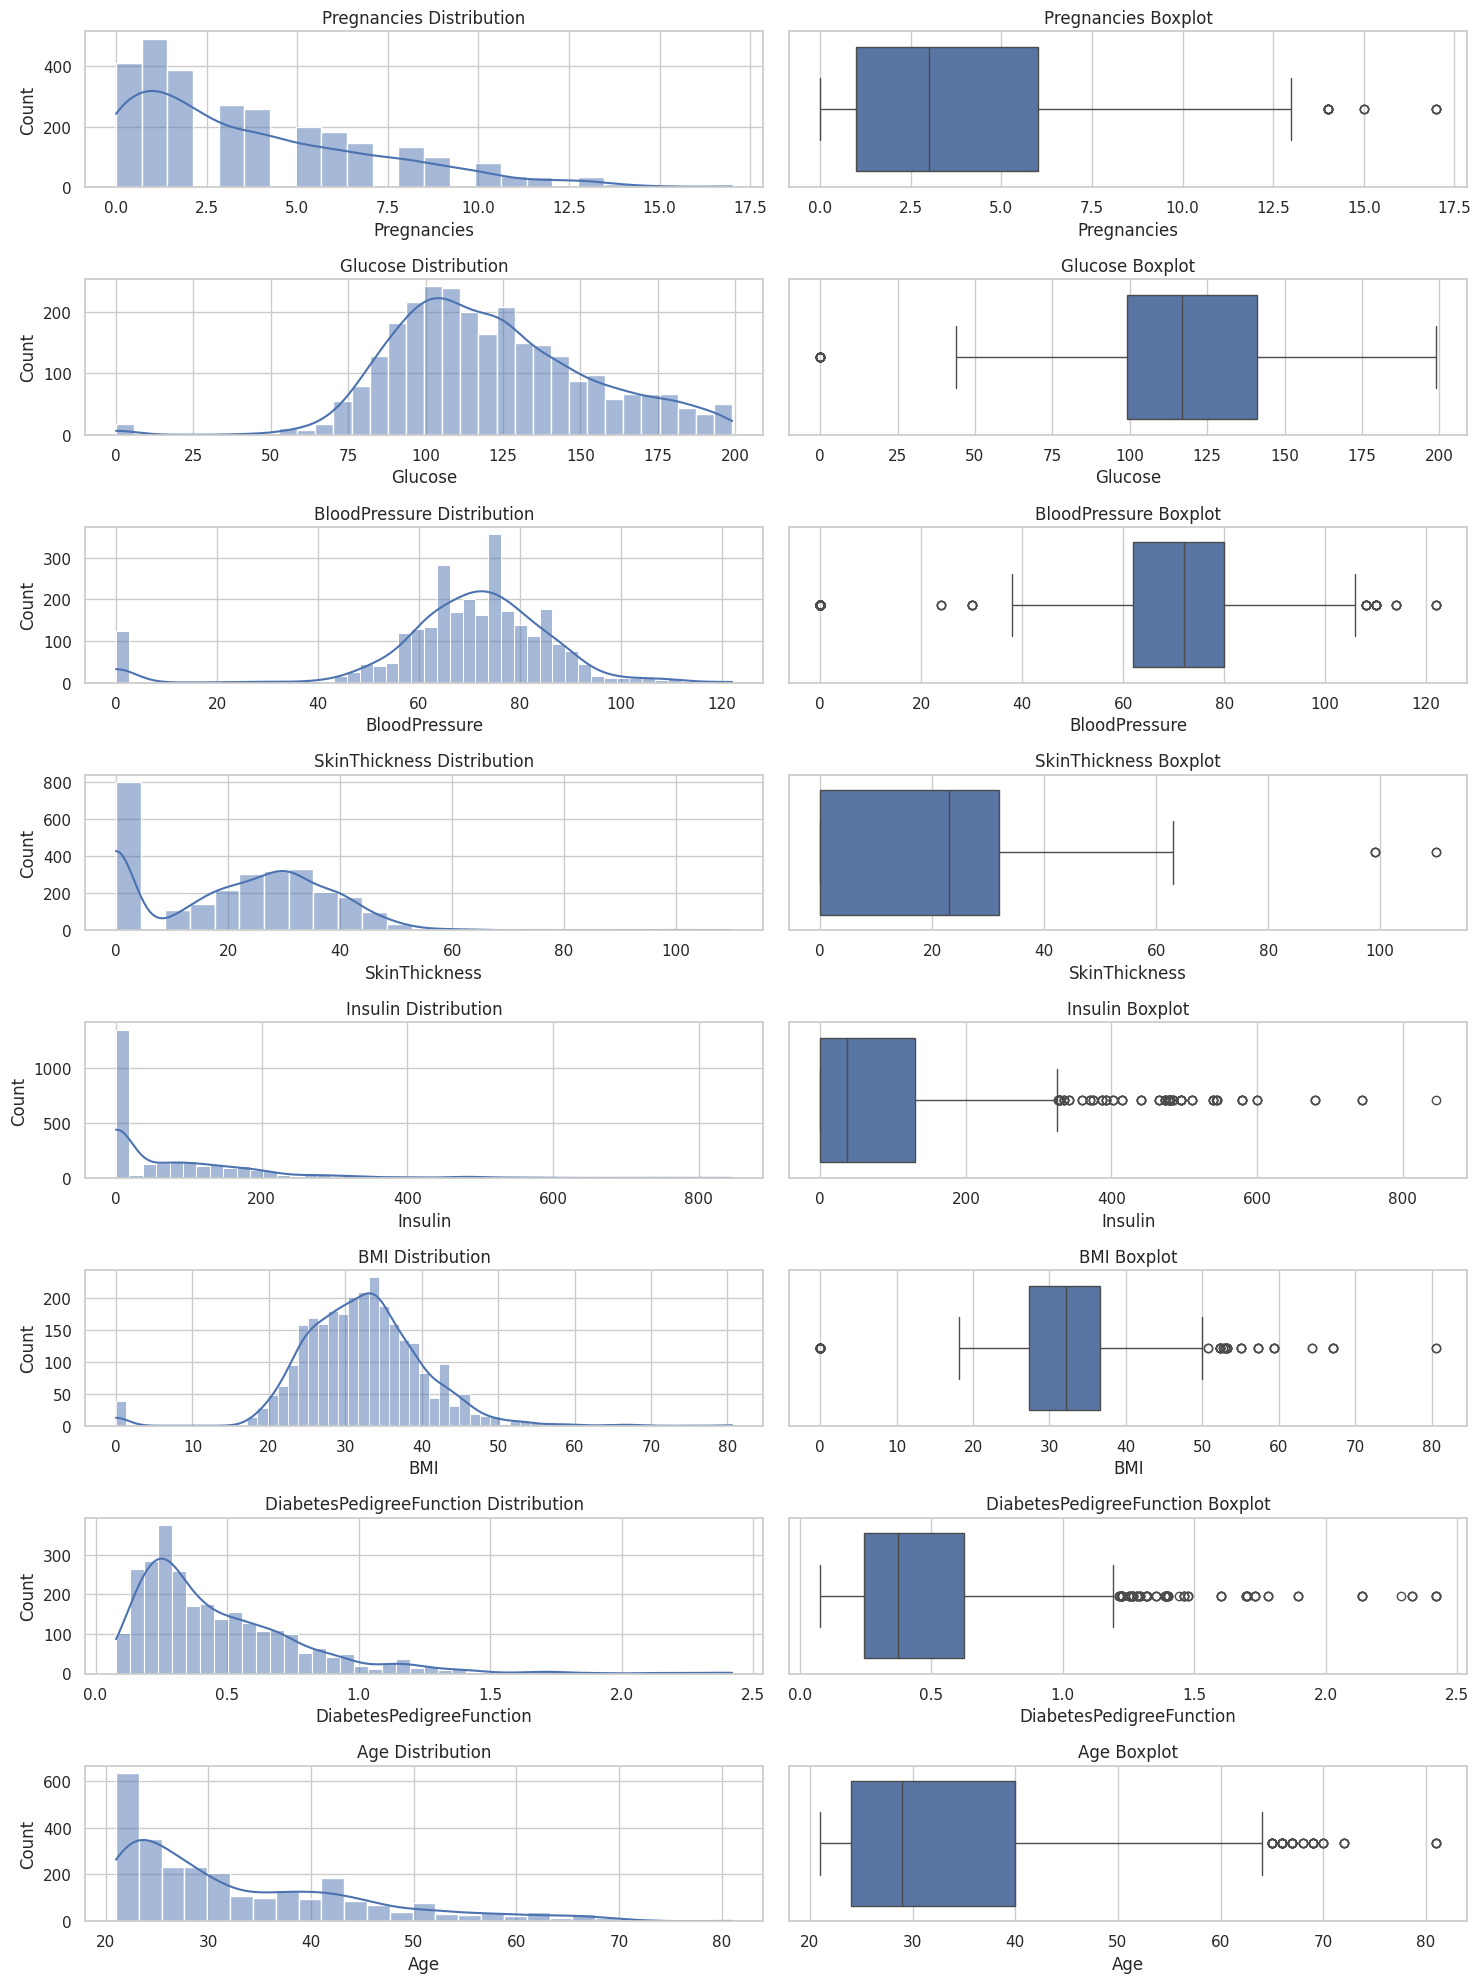

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Plot histograms for all features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(len(features), 2, figsize=(15, 20))

# Loop through each feature to create histograms and boxplots
for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} Distribution')
    axes[i, 0].set_xlabel(feature)

    # Plot boxplot
    sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Boxplot')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()

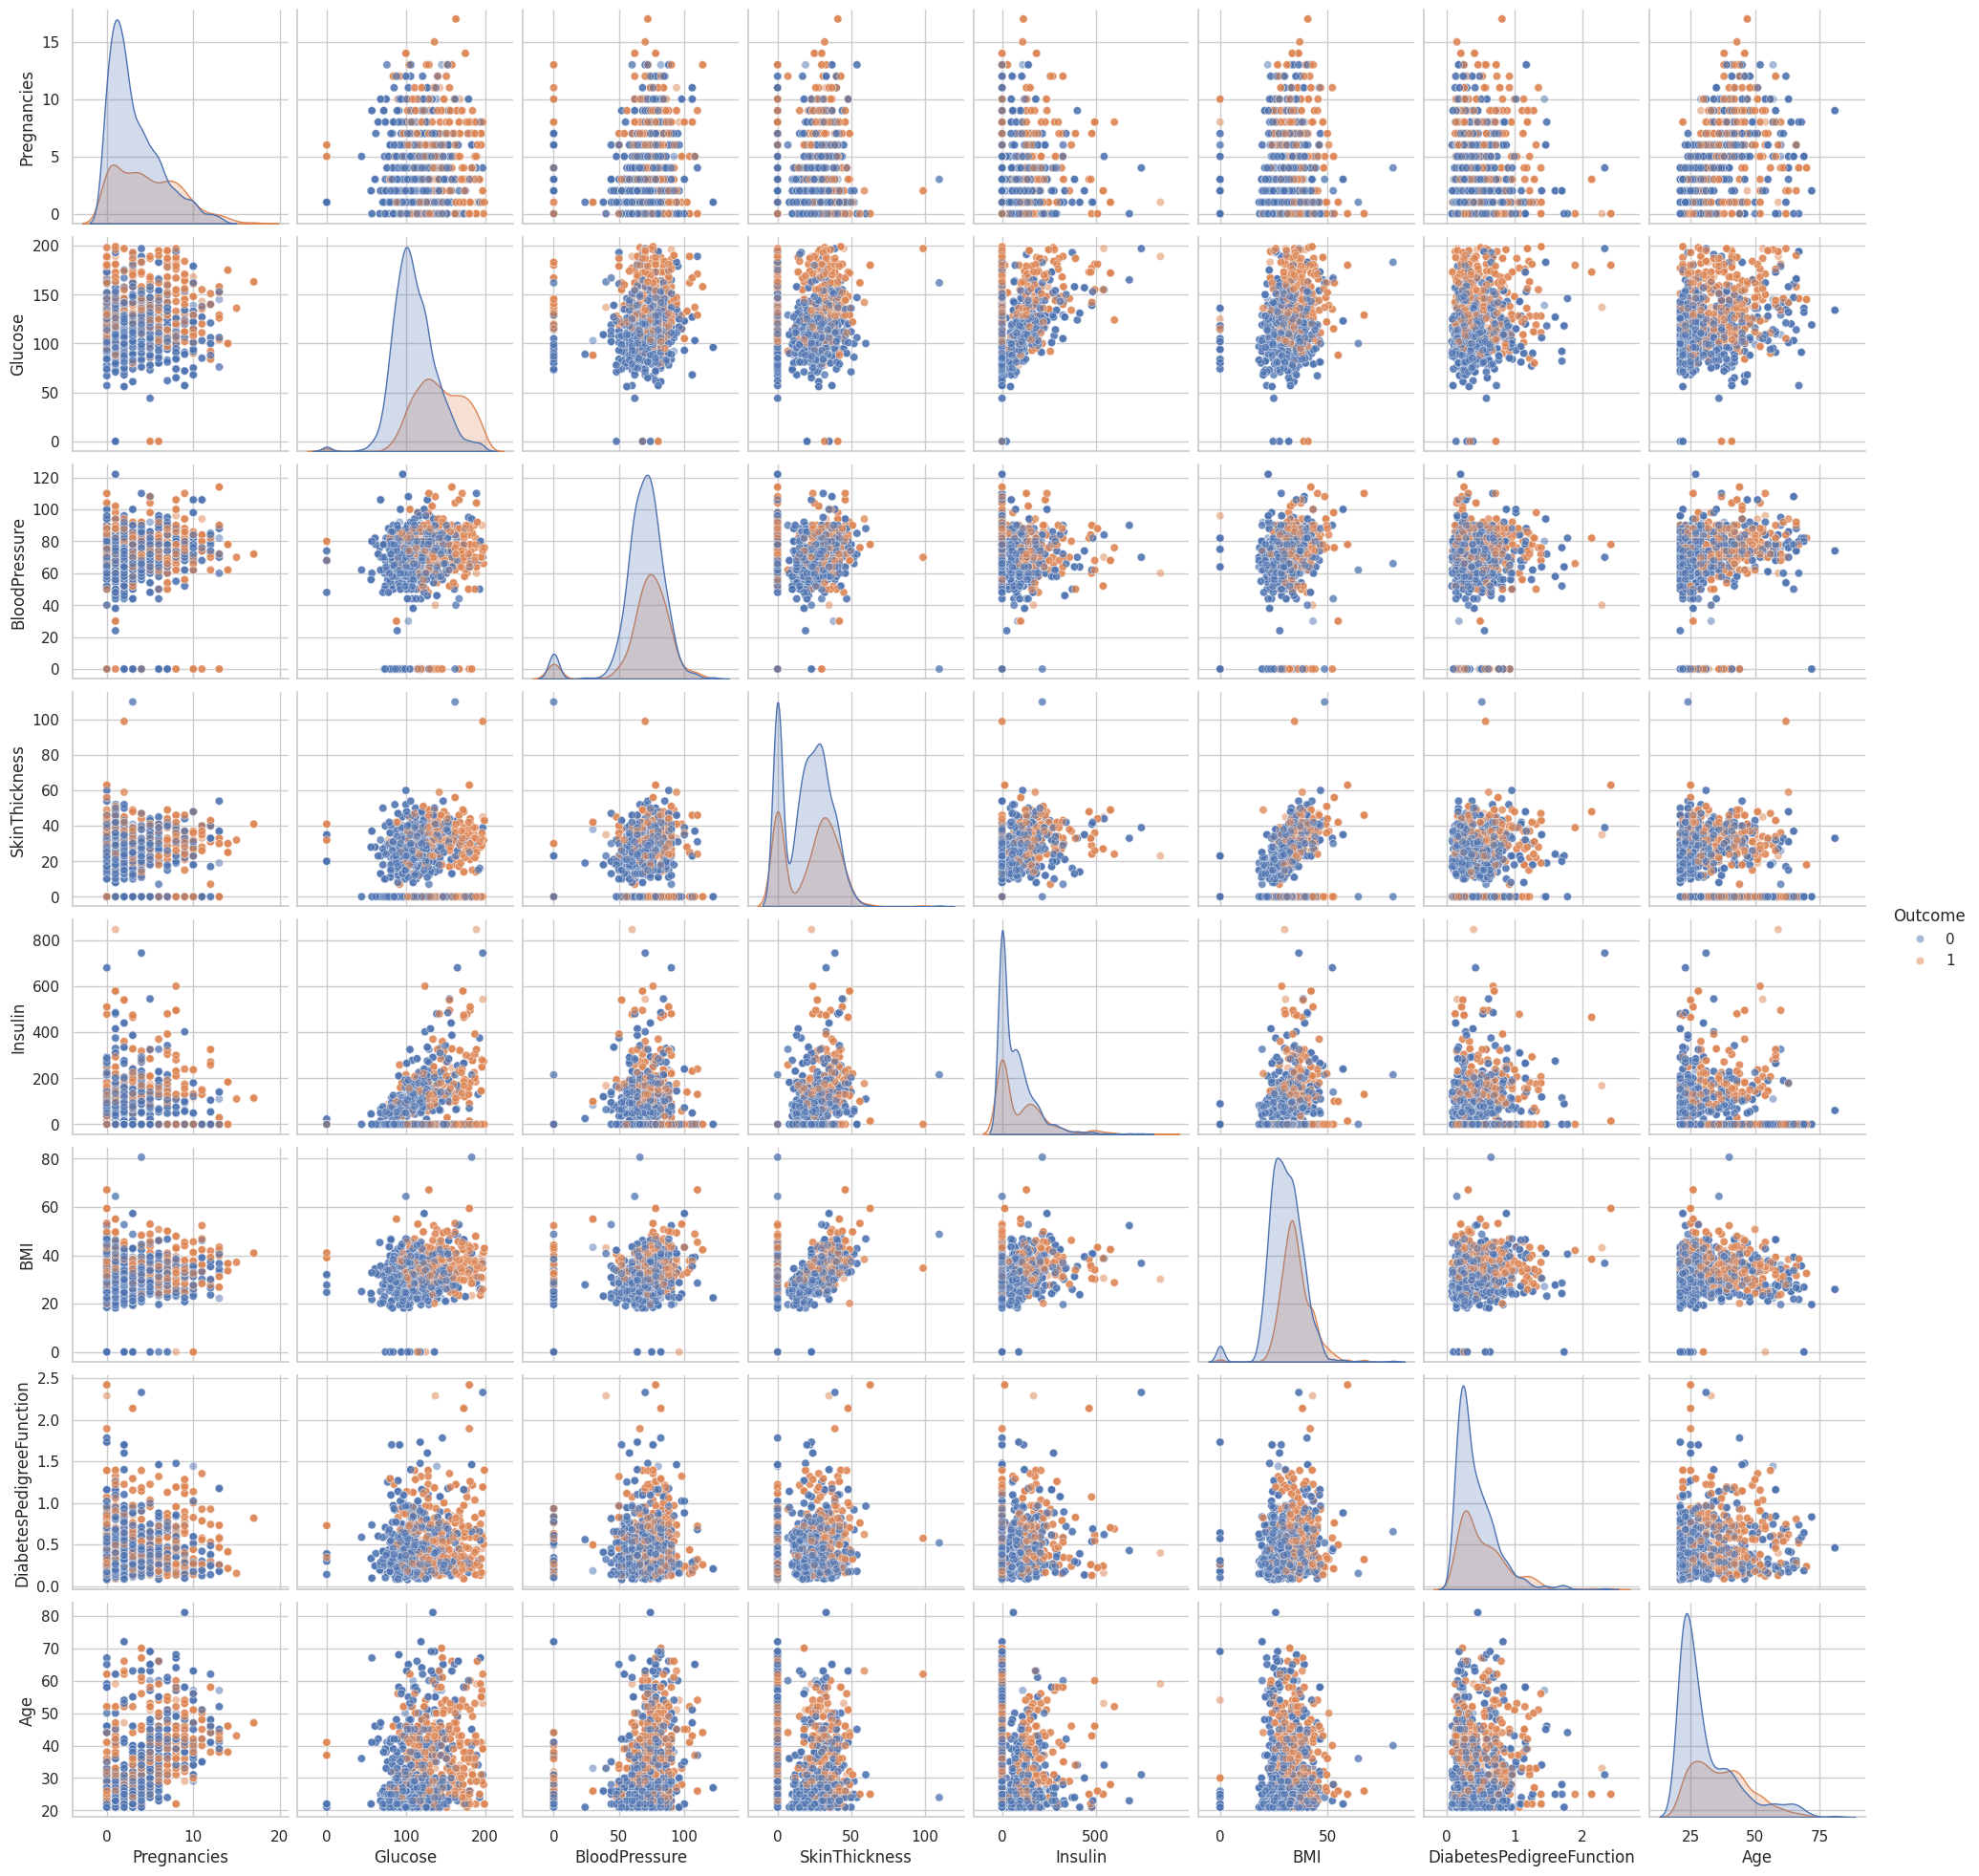

In [15]:
sns.pairplot(df, vars=features, hue='Outcome', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [16]:
df.columns


Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    print(feature)
    print(df[feature].skew())

Pregnancies
0.9590963213692726
Glucose
0.16286438598202155
BloodPressure
-1.8504500690128547
SkinThickness
0.18084092241732214
Insulin
2.078110809650225
BMI
-0.1765757093299158
DiabetesPedigreeFunction
1.8427906939007215
Age
1.1662989470696625


In [18]:
acc_baseline = df['Outcome'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.6560693641618497


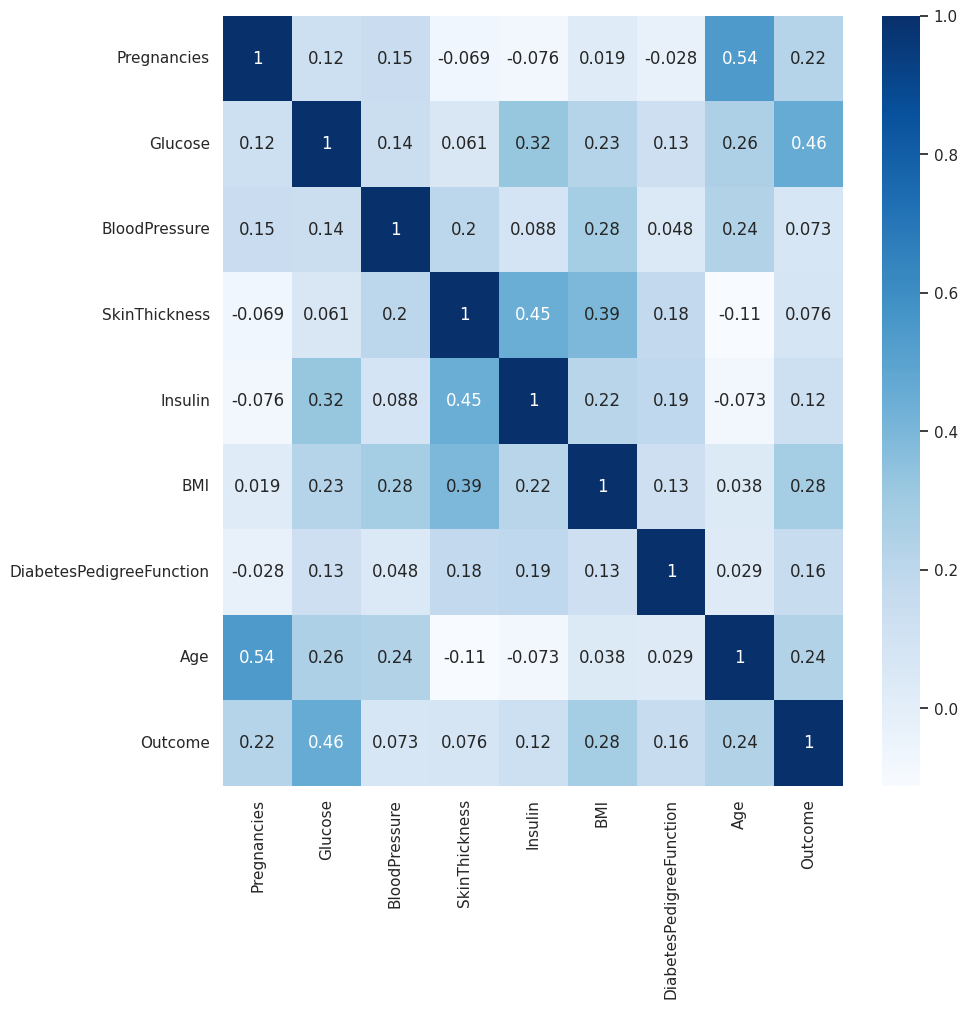

In [19]:
cor = df.drop(["Id"],axis=1).select_dtypes(include='number').copy()
corr = cor.corr()
fig , ax = plt.subplots(figsize=(10 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Blues');

In [20]:
df.drop(["Id"],axis=1,inplace=True)

In [21]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]


In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2076, 8)
(692, 8)
(2076,)
(692,)


In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))


0.7846820809248555
0.7557803468208093


In [26]:
features = x_test.columns
importances = lr.coef_[0]

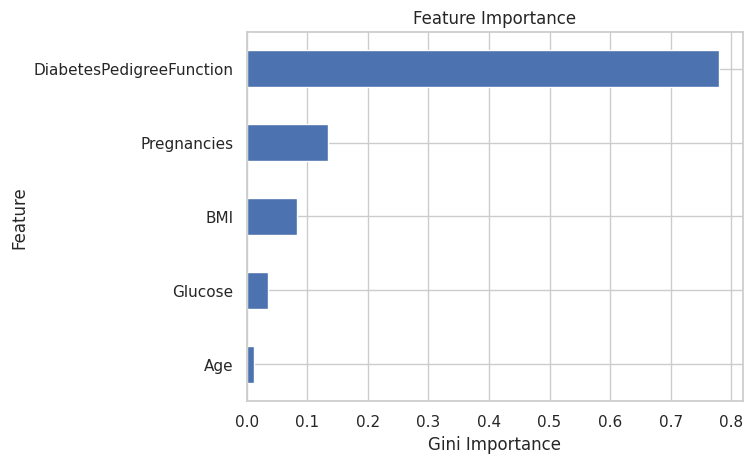

In [27]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [28]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [29]:
print(lin.score(x_train,y_train))
print(lin.score(x_test,y_test))

0.2998074032252297
0.2630488528468087


In [30]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [31]:
print(kn.score(x_train,y_train))
print(kn.score(x_test,y_test))

0.9898843930635838
0.9450867052023122


In [32]:
from sklearn.inspection import permutation_importance

# Assuming kn is your trained KNeighborsClassifier model
result = permutation_importance(kn, x_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Match importances with feature names
feature_importance_dict = dict(zip(x_test.columns, importances))

# Sort feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Glucose, Importance: 0.26112716763005783
Feature: Insulin, Importance: 0.20606936416184976
Feature: Age, Importance: 0.11994219653179194
Feature: BloodPressure, Importance: 0.11763005780346827
Feature: SkinThickness, Importance: 0.11372832369942203
Feature: BMI, Importance: 0.051156069364161894
Feature: Pregnancies, Importance: 0.020520231213872874
Feature: DiabetesPedigreeFunction, Importance: 0.0


In [33]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls


In [34]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
index_list = []
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
for feature in num:
    index_list.extend(outliers(df,feature))

In [36]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [37]:
df = remove(df,index_list)

In [38]:
df.shape


(2351, 9)

In [39]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)


In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1763, 8)
(588, 8)
(1763,)
(588,)


In [42]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [43]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7918321043675554
0.782312925170068


In [44]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

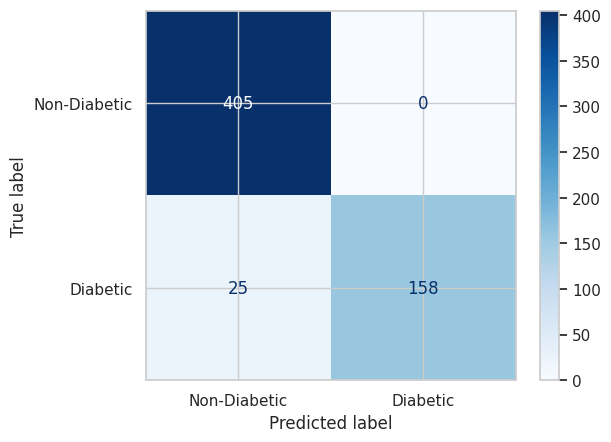

In [45]:
# Import necessary libraries for the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting the outcomes using the test data
y_pred = kn.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [47]:
# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Predicting the outcomes using the test data
y_pred = kn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


# Full Classification Report (includes precision, recall, F1, etc.)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.94      1.00      0.97       405
    Diabetic       1.00      0.86      0.93       183

    accuracy                           0.96       588
   macro avg       0.97      0.93      0.95       588
weighted avg       0.96      0.96      0.96       588



In [48]:
print(kn.score(x_train,y_train))
print(kn.score(x_test,y_test))

0.9920589903573455
0.9574829931972789
